In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import numpy as np
from qutip import *
import scipy
from scipy.optimize import fsolve
from math import factorial

In [4]:
dim_SNAIL = 5   # level cutoff of SNAIL using oscillator basis (expanded around the equilibrium in potential)
dim_bob = 3   # level cutoff of Alice using oscillator basis 
c_opt = tensor(destroy(dim_SNAIL), qeye(dim_bob))   # annihilation operator of SNAIL  
b_opt = tensor(qeye(dim_SNAIL), destroy(dim_bob))   # annihilation operator of Bob  

In [261]:
wc = 4*2*np.pi
anh = 0.2*2*np.pi
w_b = 6*2*np.pi
g_bc = 0.1*2*np.pi

In [262]:
h_SNAIL = (wc)* c_opt.dag() * c_opt + anh/2*c_opt.dag()*c_opt.dag()*c_opt*c_opt
h_tot = (h_SNAIL + (w_b) * b_opt.dag() * b_opt + g_bc * (b_opt.dag()*c_opt+b_opt*c_opt.dag()))

In [263]:
h_tot/2/np.pi

Quantum object: dims=[[5, 3], [5, 3]], shape=(15, 15), type='oper', dtype=Dia, isherm=True
Qobj data =
[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          6.          0.          0.1         0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.         12.          0.          0.14142136  0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.1         0.          4.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.14142136  0.         10.          0.
   0.14142136  0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0. 

In [264]:
gamma = 1/20
c_ops = [np.sqrt(2*gamma) * c_opt.dag() * c_opt]  # collapse operator for dephasing

In [265]:
dressed_states = h_tot.eigenstates()[1]

In [266]:
h_tot.eigenstates()[0][-1]

183.46901096964393

In [267]:
h_tot.eigenstates()[0]/2/np.pi

array([ 0.        ,  3.99501244,  6.00498756,  8.18892474, 10.00109884,
       12.00997642, 12.5813313 , 14.19660938, 16.02205932, 17.1716027 ,
       18.59144647, 20.23695082, 23.14501656, 24.65498344, 29.2       ])

In [268]:
h_tot.eigenstates()[1][-3]

Quantum object: dims=[[5, 3], [1, 1]], shape=(15, 1), type='ket', dtype=Dense
Qobj data =
[[ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [-0.19082368]
 [ 0.        ]
 [ 0.98162433]
 [ 0.        ]]

In [269]:
g = dressed_states[0]
e = dressed_states[2]
sx = g*e.dag()+e*g.dag()

In [270]:
g

Quantum object: dims=[[5, 3], [1, 1]], shape=(15, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

In [271]:
psi0 = (g + e).unit() 

In [273]:
times = np.linspace(0, 10000, 20000)  # time range for the Ramsey experiment
# Time evolution

result = mesolve(h_tot, psi0, times, c_ops,[sx])


In [274]:
ramsey_signal = result.expect[0]

In [275]:
from scipy.optimize import curve_fit
# Function to model Ramsey fringes (with decay)
def ramsey_fringe(t, A, B, T2, omega):
    return np.exp(-t / T2)*np.cos(omega*t+B)

# Fit the model to the simulated data
popt, pcov = curve_fit(ramsey_fringe, times, ramsey_signal, p0=[1, 0., 1000,20], maxfev=100000)


/tmp/ipykernel_3325026/340674712.py:4: RuntimeWarning: overflow encountered in exp
  return np.exp(-t / T2)*np.cos(omega*t+B)


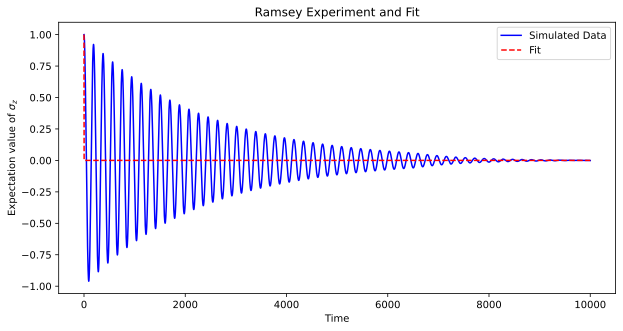

Extracted T2 (dephasing time): 0.00


In [276]:
# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(times, ramsey_signal, 'b-', label='Simulated Data')
plt.plot(times, ramsey_fringe(times, *popt), 'r--', label='Fit')
plt.title('Ramsey Experiment and Fit')
plt.xlabel('Time')
plt.ylabel('Expectation value of $\\sigma_z$')
plt.legend()
plt.show()

# Print the dephasing rate T2
print("Extracted T2 (dephasing time): {:.2f}".format(popt[2]))